In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=fbf9bd5a76fdcbc6bcb7d186f27b27e7fbfc4647501314aaf88413f073d5ce2b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

In [3]:
# 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
cancer.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# feature가 30개 
cancer['data'].shape

(569, 30)

- 차원 축소를 하기 앞서 X feature들 간의 단위 차이 조정해야 함 -> scaling

In [7]:
# 평균0, 분산 1을 갖도록 X_feature scaling: 여러 Scaler들 중 하나
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

## PCA: 2개 pc

- n_components: 주성분 개수 설정  
- 주성분 개수를 n으로 정하면, 상위 n개의 주성분만 유지

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #주성분 개수 2개

#pca 모델 학습: X_data만 필요
pca.fit(data)

#학습도니 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(data)
print("원본 데이터의 형태: ", str(data.shape))
print("축소된 데이터의 형태: ", str(data_pca.shape))

원본 데이터의 형태:  (569, 30)
축소된 데이터의 형태:  (569, 2)


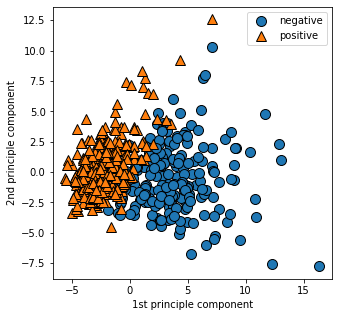

In [12]:
#차원 축소의 결과 시각화
plt.figure(figsize = (5,5))
mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], cancer.target)

plt.xlabel('1st principle component')
plt.ylabel('2nd principle component')
plt.legend(['negative', 'positive'], loc = "best") #범례추가(loc(위치) = 0, 1, 2, 3, best)

principle components는 원본 feature들의 조합으로 표현할 수 있다.   
그렇다면 어떤 조합으로 이루어져 있을까?

In [13]:
print(pca.components_[0], pca.components_[1], sep = "\n\n")

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


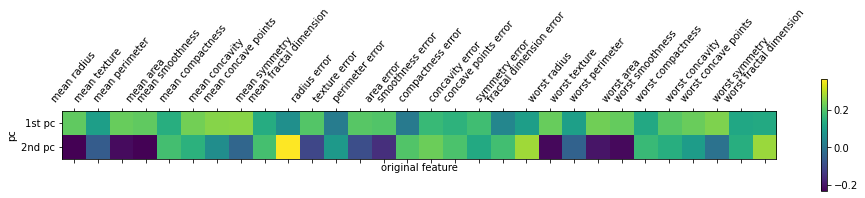

In [17]:
#w 주성분1과 주성분2가 각각 어느정도 데이터를 반영하고 있는가 >> 시각화
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation =50) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()


## PCA: 30개 pc

In [19]:
pca = PCA(n_components = 30)
pca_data = pca.fit_transform(cancer.data)

In [20]:
# 주성분 30개 (원래 데이터 feature 개수도 30개)
pc_comp = pca.components_
pc_comp.shape

(30, 30)

<Figure size 1440x1440 with 0 Axes>

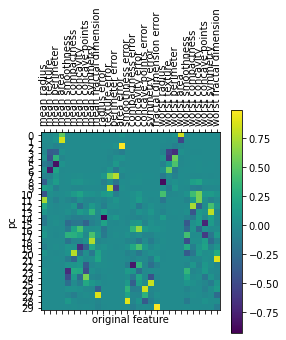

In [22]:
plt.figure(figsize = (20,20))
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.yticks(range(30))

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()